In [171]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from general_graph_utils_main import *
from steinberg_utils_3vertex import *

Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: -2.220446049250313e-16


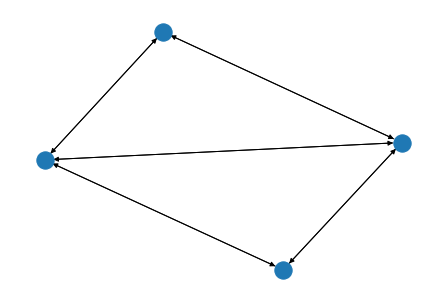

In [84]:
G, G_ud = random_graph_n(4)
nx.draw(G)

# long workflow
node_list = get_nodes(G)
num_nodes = len(node_list)
edge_list = get_edges(G)
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)
label_dict, label_list = get_labels(G)

cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,
                                                                                                             label_dict)

shared_cycle_edges_list,all_cycle_edges_forward = shared_edges_cycles(cycle_list,
                                                                      cycle_edges_forward,
                                                                      cycle_edges_backward)

products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)

cycle_labels_forward, edge_tracker, index_tracker = equilibrium_params(cycle_list,
                                                                       cycle_edges_forward,
                                                                       cycle_labels_forward,
                                                                       cycle_labels_backward,
                                                                       shared_cycle_edges_list)

[  9.8570254  -11.49267081]
Cycle 0 affinity after solve: 2.2204460492503128e-16
Cycle 1 affinity after solve: 0.0


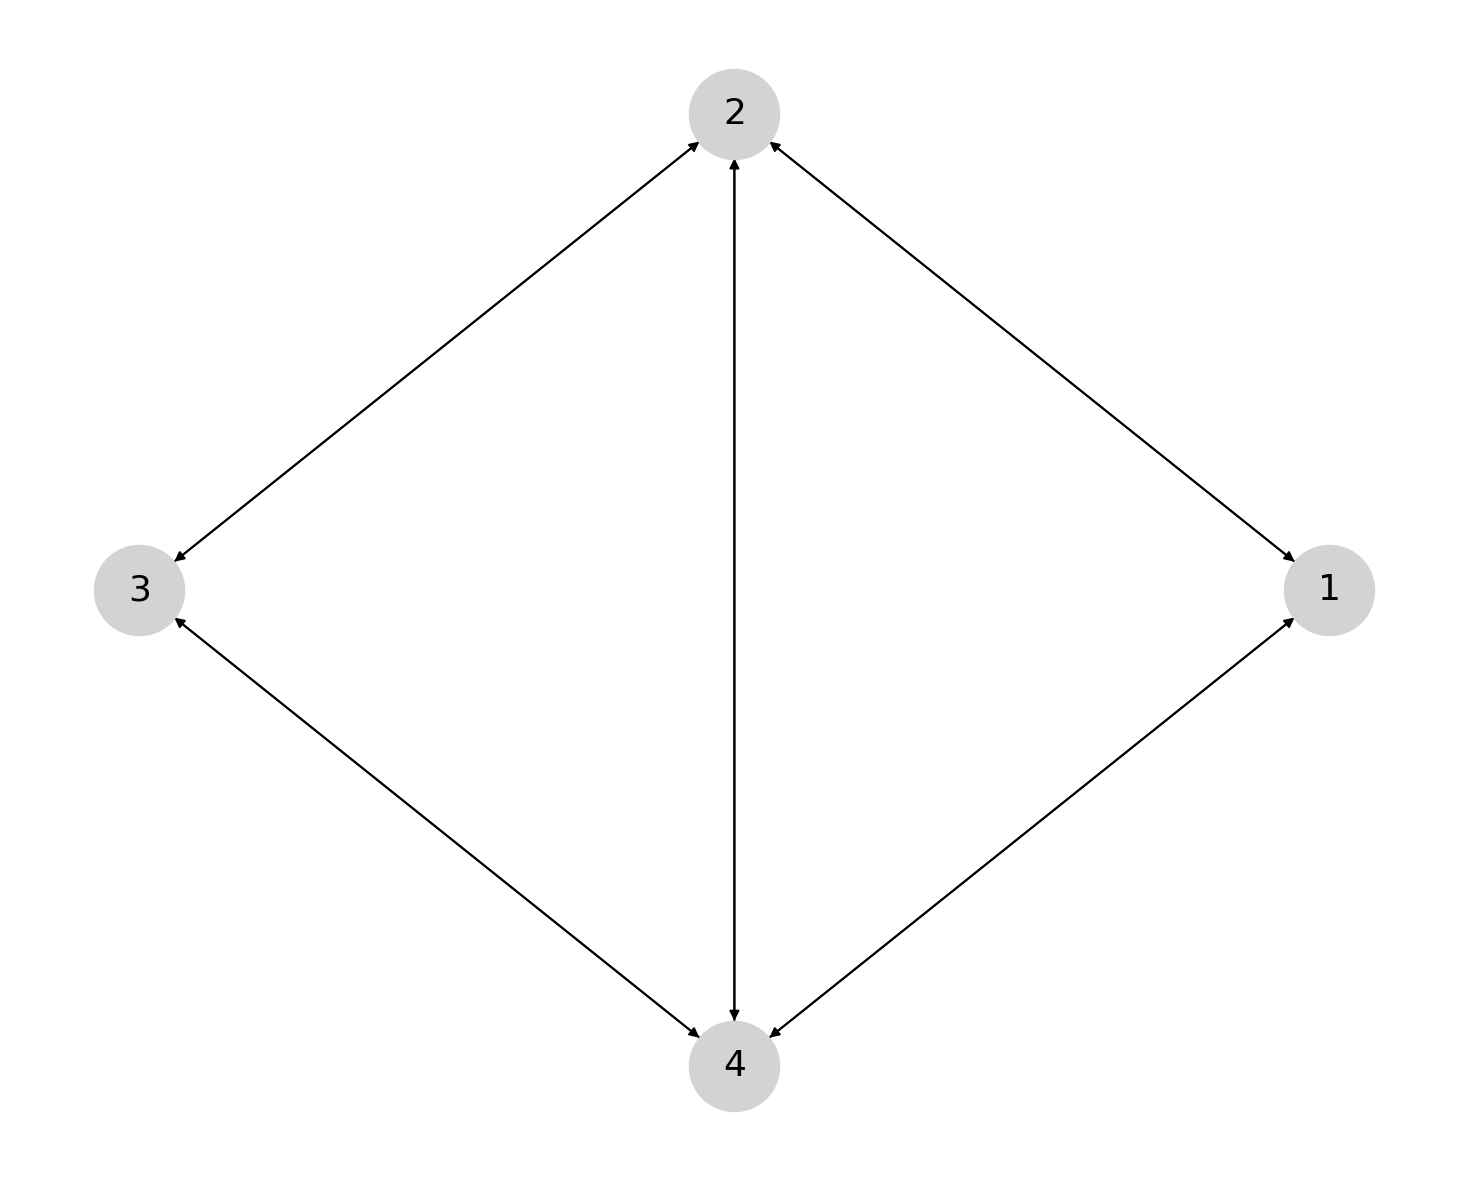

In [170]:
# cleaner workflow to test

# create the graphs
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1, 4)
G.add_edge(4, 1)
G.add_edge(3, 4)
G.add_edge(4, 3)
G.add_edge(3, 2)
G.add_edge(2, 3)
G.add_edge(4, 2)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(2, 1)

G_ud = nx.Graph()
G_ud.add_node(1)
G_ud.add_node(2)
G_ud.add_node(3)
G_ud.add_node(4)
G_ud.add_edge(1, 4)
G_ud.add_edge(4, 1)
G_ud.add_edge(3, 4)
G_ud.add_edge(4, 3)
G_ud.add_edge(3, 2)
G_ud.add_edge(2, 3)
G_ud.add_edge(4, 2)
G_ud.add_edge(2, 4)
G_ud.add_edge(1, 2)
G_ud.add_edge(2, 1)

nx.draw(G, 
        pos=nx.circular_layout(G), 
        with_labels=True, 
        node_size=2000, 
        node_color = 'lightgray', 
        font_size=18, 
        font_color='black', 
        font_family='sans-serif')

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict,label_list = get_labels_ones(G)

# get cycles
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, get_labels(G)[0])

# compute affinities (if you want)
prodf = calculate_cycle_products(labelsf, labelsb)[0]
prodb = calculate_cycle_products(labelsf, labelsb)[1]
affs = calculate_affinities(prodf,prodb,cycles)
print(affs)

# which edges are shared between cycles?
shared_edges, all_edges_f = shared_edges_cycles(cycles,
                                            edgesf,
                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                         idx_tracker,
                                         new_labelsf,
                                         label_dict,
                                         edge_list)

# Then build the Laplacian with the new labels:
L = Laplacian_all(edge_list, label_list, node_list)

In [179]:
np.random.seed(2)

# create the graphs
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(1, 4)
G.add_edge(4, 1)
G.add_edge(3, 4)
G.add_edge(4, 3)
G.add_edge(3, 2)
G.add_edge(2, 3)
G.add_edge(4, 2)
G.add_edge(2, 4)

G_ud = nx.Graph()
G_ud.add_node(1)
G_ud.add_node(2)
G_ud.add_node(3)
G_ud.add_node(4)
G_ud.add_edge(1, 2)
G_ud.add_edge(2, 1)
G_ud.add_edge(1, 4)
G_ud.add_edge(4, 1)
G_ud.add_edge(3, 4)
G_ud.add_edge(4, 3)
G_ud.add_edge(3, 2)
G_ud.add_edge(2, 3)
G_ud.add_edge(4, 2)
G_ud.add_edge(2, 4)

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict,label_list = get_labels(G)
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, get_labels(G)[0])

# which edges are shared between cycles?
shared_edges, all_edges_f = shared_edges_cycles(cycles,
                                            edgesf,
                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                                 idx_tracker,
                                                 new_labelsf,
                                                 label_dict,
                                                 edge_list)

label_dict = new_label_dict
label_list = new_label_list

edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict)
L  = Laplacian_all(edge_list, label_list, node_list)
pi = steady_state_spectrum(L)

perturb_edge = edgesf[0][2]
print(perturb_edge)

#----#

signal = make_observable(node_list)
alpha, beta  = 1, 3

Cycle 0 affinity after solve: 2.2204460492503128e-16
Cycle 1 affinity after solve: -1.1102230246251565e-16
[(2, 4), (4, 1), (1, 2)]
(1, 2)


In [178]:
N = 3000
all_affinities = np.zeros((N,len(cycles)))
all_areas = np.zeros((N,1))

for i in tqdm(range(0,N)):
    
    # 1. update the edge label value for the chosen rate in label_dict, label_list    
    label_list = np.array([label_dict[e] for e in edge_list], dtype=float)
    edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict)
    
    # 2. update the Laplacian
    L = Laplacian_all(edge_list,label_list,node_list)
    
    # 3. calculate and store the affinity
    prodf, prodb = calculate_cycle_products(labelsf, labelsb)
    all_affinities[i] = calculate_affinities(prodf,prodb,cycles)
    
    # 4. calculate and store the Steinberg signature
    tau, _ = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_spectrum(L)
    a13, a31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    all_areas[i] = numerical_area(a13,a31)
    
    # 5. perturb chosen parameter for next iteration 
    label_dict[perturb_edge] *= 1.01

  1%|▏                                        | 16/3000 [00:02<07:02,  7.06it/s]


KeyboardInterrupt: 

In [172]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(10,8)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

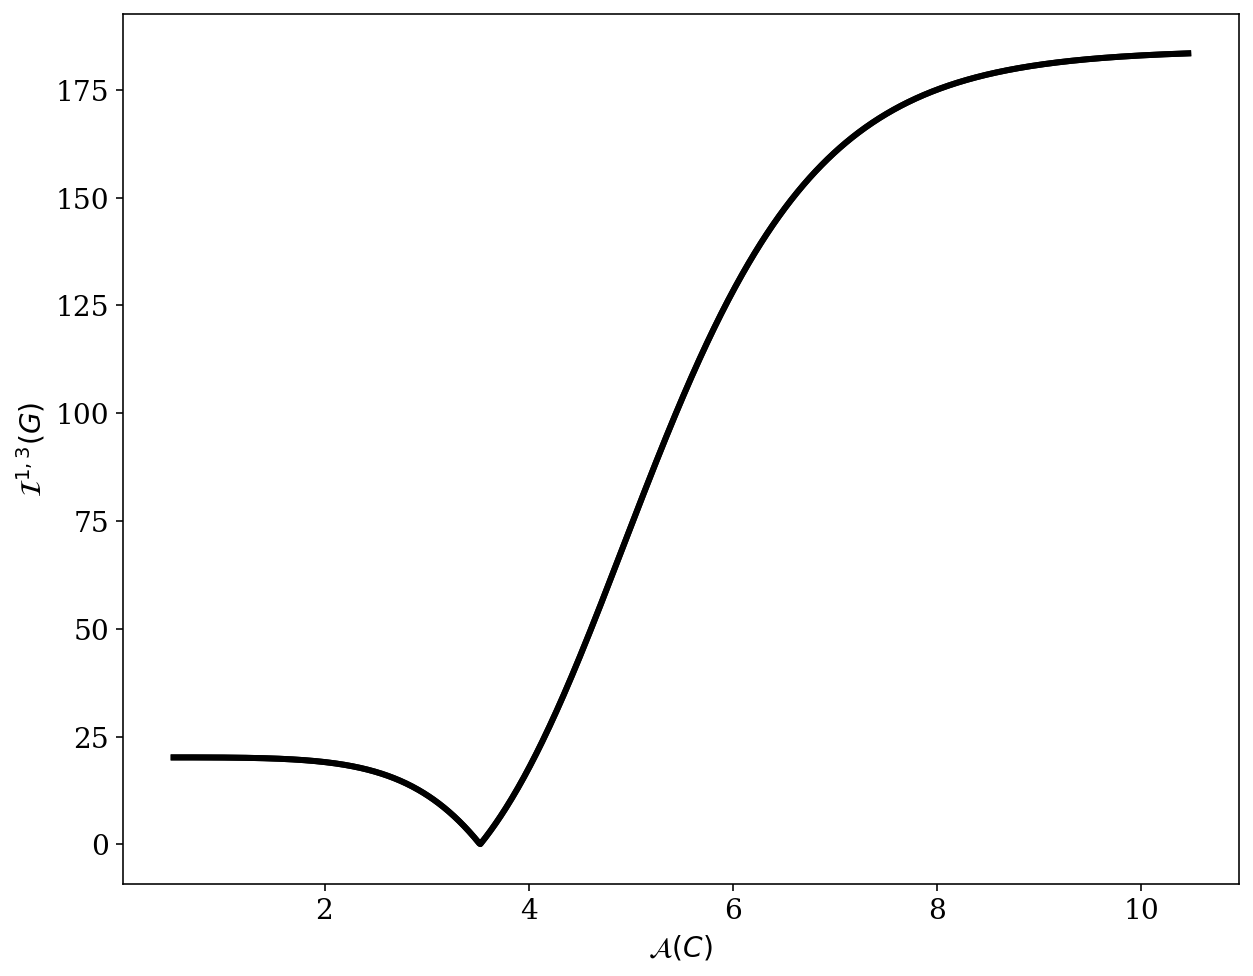

In [160]:
fig = plt.figure()
for i in range(len(cycles)):
    plt.plot(np.abs(all_affinities[:,0]),all_areas,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=3, color= 'black')
plt.xlabel(r"$\mathcal{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
#fig.savefig('4v2c_all1.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')